# Библиотека matplotlib

Есть несколько пакетов для построения графиков. Один из наиболее популярных &mdash; `matplotlib`. Если в `jupyter notebook` выполнить специальную магическую команду `%matplotlib inline`, то графики будут строиться в том же окне браузера. Есть другие варианты, в которых графики показываются в отдельных окнах. Это удобно для трёхмерных графиков &mdash; тогда их можно вертеть мышкой (в случае inline графиков это невозможно). Графики можно также сохранять в файлы, как в векторных форматах (`eps`, `pdf`, `svg`), так и в растровых (`png`, `jpg`; конечно, растровые форматы годятся только для размещения графиков на web-страницах). `matplotlib` позволяет строить двумерные графики практически всех нужных типов, с достаточно гибкой регулировкой их параметров; он также поддерживает основные типы трёхмерных графиков, но для серьёзной трёхмерной визуализации данных лучше пользоваться более мощными специализированными системами.

Некоторые функции отрисовки
* `plt.scatter(x, y, params)` &mdash; нарисовать точки с координатами из $x$ по горизонтальной оси и из $y$ по вертикальной оси
* `plt.plot(x, y, params)` &mdash; нарисовать график по точкам с координатами из $x$ по горизонтальной оси и из $y$ по вертикальной оси. Точки будут соединятся в том порядке, в котором они указаны в этих массивах.
* `plt.fill_between(x, y1, y2, params)` &mdash; закрасить пространство между $y_1$ и $y_2$ по координатам из $x$.
* `plt.pcolormesh(x1, x1, y, params)` &mdash; закрасить пространство в соответствии с интенсивностью $y$.
* `plt.contour(x1, x1, y, lines)` &mdash; нарисовать линии уровня. Затем нужно применить `plt.clabel`


Вспомогательные функции
* `plt.figure(figsize=(x, y))` &mdash; создать график размера $(x, y)$
* `plt.show()` &mdash; показать график.
* `plt.subplot(...)` &mdash; добавить подграфик
* `plt.xlim(x_min, x_max)` &mdash; установить пределы графика по горизонтальной оси
* `plt.ylim(y_min, y_max)` &mdash; установить пределы графика по вертикальной оси
* `plt.title(name)` &mdash; установить имя графика
* `plt.xlabel(name)` &mdash; установить название горизонтальной оси
* `plt.ylabel(name)` &mdash; установить название вертикальной оси
* `plt.legend(loc=...)` &mdash; сделать легенду в позиции loc
* `plt.grid()` &mdash; добавить сетку на график
* `plt.savefig(filename)` &mdash; сохранить график в файл

http://matplotlib.org/gallery.html (англ.) &mdash; тысячи примеров

У функций в `matplotlib` много параметров.
Для того, чтобы посмотреть все параметры, можно воспользоваться справкой:

`plt.plot?`

Рекомендуемое ядро для запуска кода: `Python v3.7` или выше.

In [1]:
from os import mkdir
from os.path import isdir, join as join_path
from functools import partial
from warnings import filterwarnings

import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D


filterwarnings('ignore')

DATA_DIR = 'class_data/'  # Папка, куда мы будем сохранять все файлы
if not isdir(DATA_DIR):
    mkdir(DATA_DIR)

to_data_dir = partial(join_path, DATA_DIR)
print(f'Пример работы функции \'to_data_dir\': {to_data_dir("test.file")}')

%matplotlib inline

Пример работы функции 'to_data_dir': class_data/test.file


Список $y$ координат; $x$ координаты образуют последовательность 0, 1, 2, ...

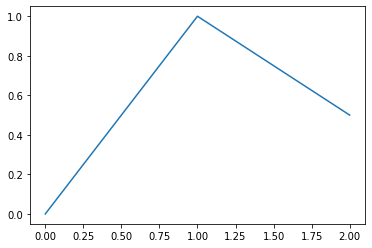

In [2]:
plt.figure()
plt.plot([0, 1, 0.5])
plt.show()

Списки $x$ и $y$ координат точек. Точки соединяются прямыми, т.е. строится ломаная линия.

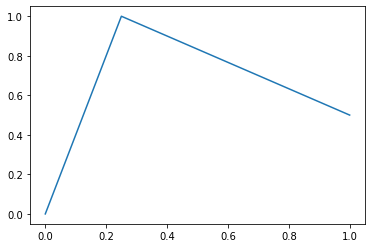

In [3]:
plt.figure()
plt.plot([0, 0.25, 1], [0, 1, 0.5])
plt.show()

`scatter` просто рисует точки, не соединяя из линиями.

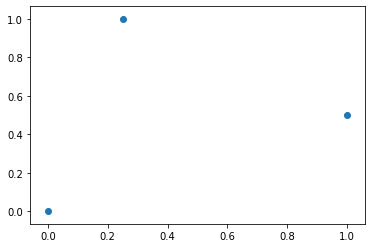

In [4]:
plt.figure()
plt.scatter([0, 0.25, 1], [0, 1, 0.5])
plt.show()

$x$ координаты не обязаны монотонно возрастать. Тут, например, мы строим замкнутый многоугольник.

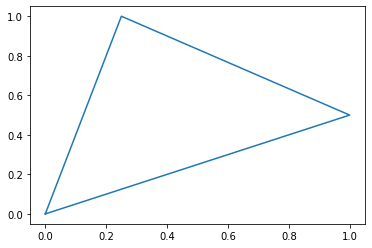

In [5]:
plt.figure()
plt.plot([0, 0.25, 1, 0], [0, 1, 0.5, 0])
plt.show()

Когда точек много, ломаная неотличима от гладкой кривой.

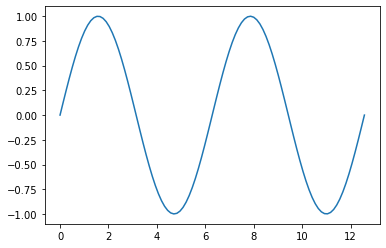

In [3]:
x = np.linspace(0, 4 * np.pi, 100)

plt.figure()
plt.plot(x, np.sin(x))
plt.show()

Массив $x$ не обязан быть монотонно возрастающим. Можно строить любую параметрическую линию $x=x(t)$, $y=y(t)$.

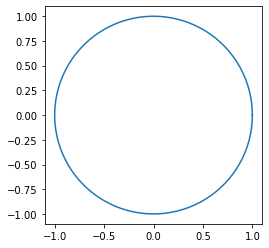

In [7]:
t = np.linspace(0, 2 * np.pi, 100)

plt.figure()
plt.plot(np.cos(t), np.sin(t))
plt.axes().set_aspect(1)
plt.show()

Чтобы окружности выглядели как окружности, а не как эллипсы, (а квадраты как квадраты, а не как прямоугольники), нужно установить aspect ratio, равный 1.

А вот одна из фигур Лиссажу.

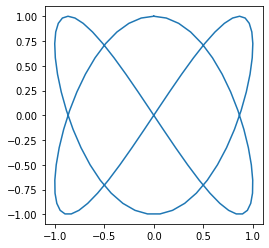

In [8]:
plt.figure()
plt.plot(np.sin(2 * t), np.cos(3 * t))
plt.axes().set_aspect(1)
plt.show()

Несколько кривых на одном графике. Каждая задаётся парой массивов - $x$ и $y$ координаты. По умолчанию, им присваиваются цвета из некоторой последовательности цветов; разумеется, их можно изменить.

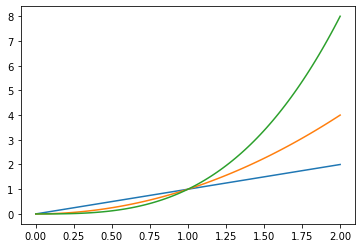

In [9]:
x = np.linspace(0, 2, 100)

plt.figure()
plt.plot(x, x, x, x**2, x, x**3)
plt.show()

Для простой регулировки цветов и типов линий после пары $x$ и $y$ координат вставляется форматная строка. Первая буква определяет цвет (`'r'` - красный, `'b'` - синий и т.д.), дальше задаётся тип линии (`'-'` - сплошная, `'--'` - пунктирная, `'-.'` - штрих-пунктирная и т.д.).

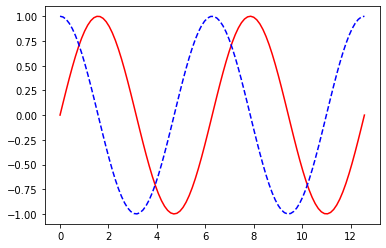

In [10]:
x = np.linspace(0, 4 * np.pi, 100)

plt.figure()
plt.plot(x, np.sin(x), 'r-')
plt.plot(x, np.cos(x), 'b--')
plt.show()

Если в качестве "типа линии" указано `'o'`, то это означает рисовать точки кружочками и не соединять их линиями; аналогично, `'s'` означает квадратики. Конечно, такие графики имеют смысл только тогда, когда точек не очень много.

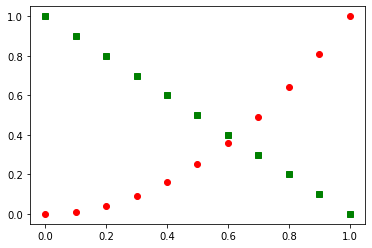

In [4]:
x = np.linspace(0, 1, 11)

plt.figure()
plt.plot(x, x ** 2, 'ro')
plt.plot(x, 1 - x, 'gs')
plt.show()

Вот пример настройки почти всего, что можно настроить. Можно задать последовательность засечек на оси $x$ (и $y$) и подписи к ним (в них, как и в других текстах, можно использовать $\LaTeX$-овские обозначения). Задать подписи осей $x$ и $y$ и заголовок графика. Во всех текстовых элементах можно задать размер шрифта. Можно задать толщину линий и штрихи (так, на графике косинуса рисуется штрих длины 8, потом участок длины 4 не рисуется, потом участок длины 2 рисуется, потом участок длины 4 опять не рисуется, и так по циклу; поскольку толщина линии равна 2, эти короткие штрихи длины 2 фактически выглядят как точки). Можно задать подписи к кривым (legend); где разместить эти подписи тоже можно регулировать.

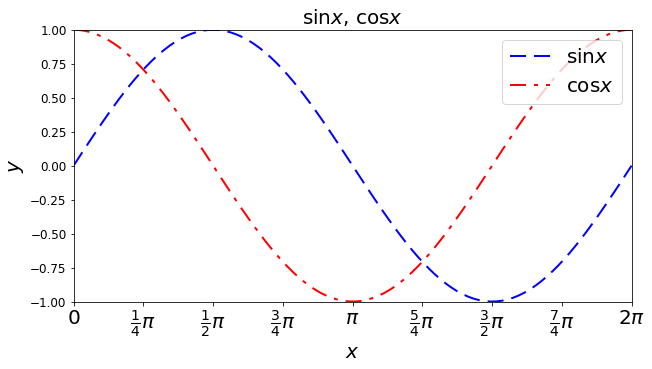

In [5]:
x = np.linspace(0, 2 * np.pi, 100)

plt.figure(figsize=(10, 5))

plt.plot(

    x, np.sin(x),
    linewidth=2, color='b', dashes=[8, 4], label=r'$\sin x$'
)

plt.plot(

    x, np.cos(x),
    linewidth=2, color='r', dashes=[8, 4, 2, 4], label=r'$\cos x$'
)

plt.axis([0, 2 * np.pi, -1, 1])    # Устанавливает координаты границ картинки
plt.xticks(
    np.linspace(0, 2 * np.pi, 9),  # Где сделать отметки
    (                              # Как подписать ось
        '0',
        r'$\frac{1}{4}\pi$',
        r'$\frac{1}{2}\pi$',
        r'$\frac{3}{4}\pi$',
        r'$\pi$',
        r'$\frac{5}{4}\pi$',
        r'$\frac{3}{2}\pi$',
        r'$\frac{7}{4}\pi$',
        r'$2\pi$'
    ),
    fontsize=20
)

plt.yticks(fontsize=12)
plt.xlabel(r'$x$', fontsize=20)
plt.ylabel(r'$y$', fontsize=20)
plt.title(r'$\sin x$, $\cos x$', fontsize=20)
plt.legend(fontsize=20, loc=1)
plt.show()

Если `linestyle=''`, то точки не соединяются линиями. Сами точки рисуются маркерами разных типов. Тип определяется строкой из одного символа, который чем-то похож на нужный маркер. В добавок к стандартным маркерам, можно определить самодельные.

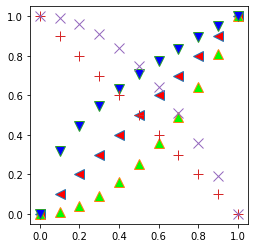

In [6]:
x = np.linspace(0, 1, 11)

plt.figure()

plt.plot(

    x, x,
    linestyle='', marker='<', markersize=10, markerfacecolor='#FF0000'
)

plt.plot(

    x, x ** 2,
    linestyle='', marker='^', markersize=10, markerfacecolor='#00FF00'
)

plt.plot(

    x, x ** (1/2),
    linestyle='', marker='v', markersize=10, markerfacecolor='#0000FF'
)

plt.plot(

    x, 1 - x,
    linestyle='', marker='+', markersize=10, markerfacecolor='#0F0F00'
)
plt.plot(

    x, 1 - x ** 2,
    linestyle='', marker='x', markersize=10, markerfacecolor='#0F000F'
)

plt.axis([-0.05, 1.05, -0.05, 1.05])
plt.axes().set_aspect(1)
plt.show()

## Логарифмический масштаб

Если $y$ меняется на много порядков, то удобно использовать логарифмический масштаб по $y$.

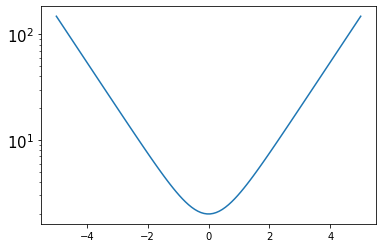

In [7]:
x = np.linspace(-5, 5, 100)

plt.figure()
plt.plot(x, np.exp(x) + np.exp(-x))
plt.yscale('log')
plt.yticks(fontsize=15)
plt.show()

Можно задать логарифмический масштаб по обоим осям.

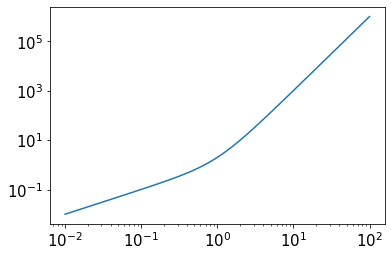

In [8]:
x = np.logspace(-2, 2, 100)

plt.figure()
plt.plot(x, x + x ** 3)
plt.xscale('log'), plt.xticks(fontsize=15)
plt.yscale('log'), plt.yticks(fontsize=15)
plt.show()

## Полярные координаты

Первый массив - $\varphi$, второй - $r$. Вот спираль.

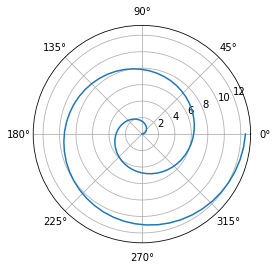

In [10]:
t = np.linspace(0, 4 * np.pi, 100)

plt.figure()
plt.polar(t, t)
plt.show()

А это угловое распределение пионов в $e^+ e^-$ аннигиляции.

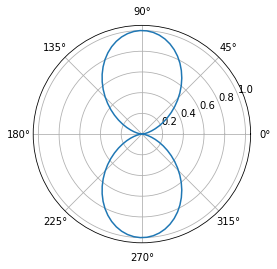

In [11]:
phi = np.linspace(0, 2 * np.pi, 100)

plt.figure()
plt.polar(phi, np.sin(phi) ** 2)
plt.show()

## Экпериментальные данные

Сгенерируем выборку из стандартного нормального распределения.
Нанесем на график точки выборки.

In [12]:
import scipy.stats as sps

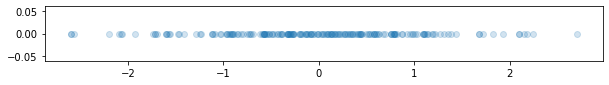

In [13]:
sample = sps.norm.rvs(size=200)

plt.figure(figsize=(10, 1))
plt.scatter(sample, np.zeros(200), alpha=0.2)  # alpha - прозрачность точки
plt.show()

Можно добавить график плотности

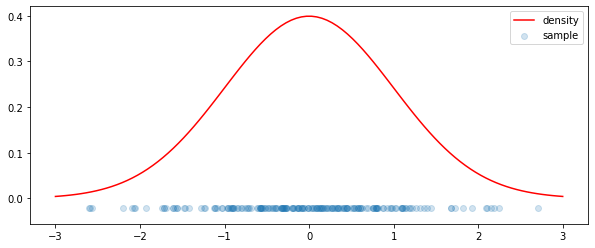

In [14]:
grid = np.linspace(-3, 3, 100)  # задаем сетку для построения графика плотности

plt.figure(figsize=(10, 4))

plt.scatter(

    sample, np.zeros(200) - 0.02, 
    alpha=0.2, label='sample'  # label - описание в легенде
)

plt.plot(

    grid, sps.norm.pdf(grid), 
    color='red', label='density'
)
plt.legend()  # добавляет легенду
plt.show()

Нарисуем гистограмму

In [ ]:
plt.figure()

n, bins, patches = plt.hist(

    sample, range=(-3, 3), 
    bins=20, density=True  # density - нормированный (интеграл равен 1)
)

plt.plot(

    grid, sps.norm.pdf(grid), 
    color='red', label='density'
)
plt.text(
    -2, 0.3,
    r'$\frac{1}{\sqrt{2\pi}}\,e^{-x^2/2}$',

    fontsize=20, horizontalalignment='center', verticalalignment='center'
)
plt.show()

Предположим, что выборка приходит постепенно.
Для каждого момента времени посчитаем выборочное среднее и доверительный интервал.
Нанесем их на график.

In [ ]:
time = np.arange(1, 201)
means = sample.cumsum() / np.arange(1, 201)

plt.figure(figsize=(15, 8))
plt.scatter(

    time, sample,
    alpha=0.2, s=40, label='sample'  # s - размер точек
)

plt.plot(

    time, means,
    color='red', linewidth=2.5, label='sample mean $\overline{X}$'
)

plt.fill_between(   # заполняет пространство между двумя функциями
    time, means + 2 / np.sqrt(time), means - 2 / np.sqrt(time), alpha=0.15
)

plt.legend()

plt.xlim((1, 200))  # размеры графика по горизонтальной оси (ставим None, если по стороне ограничений нет)
plt.ylim((-3, 3))   # размеры графика по вертикальной оси 

plt.xlabel('Time')              # название горизонтальной оси (аналогично plt.ylabel)
plt.title('Sample by time')     # имя графика
plt.grid()                      # добавляем сетку
plt.savefig(
    to_data_dir('example.png')  # сохранение в файл; расширение (png/pdf и т.д.) интерпретируется автоматически
)
plt.show()

Посмотрим еще на то, как можно закрашивать график в соответствии с какой-то функцией.
Для примера возьмем плотность распределения $\mathscr{N} \left( \begin{pmatrix} 0 \\ 0 \end{pmatrix},  \begin{pmatrix} 2 & 1 \\ 1 & 2 \end{pmatrix} \right)$.

In [ ]:
from itertools import product
# Возвращает все уникальные сочетания элементов из различных итерируемых объектов на входе

coord_range = np.arange(-3., 3., 0.05)
coordinates = np.array(tuple(product(coord_range, coord_range)))
# Координаты всех точек в квадрате размера 6 с центром в (0, 0) с шагом 0.05

distr = sps.multivariate_normal(mean=[0, 0], cov=[[2, 1], [1, 2]])
density = distr.pdf(coordinates)  # Плотность вероятности, соответсвующая координатам

xs, ys = zip(*coordinates)
xs = np.array(xs).reshape(len(coord_range), -1)  # Reshape нужен для plt.pcolormesh,
ys = np.array(ys).reshape(len(coord_range), -1)  # поскольку она принимает meshgrid

density = density.reshape(len(coord_range), -1)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.pcolormesh(xs, ys, density, cmap='Oranges')  # закрасить с интенсивностью density, cmap - цветовая схема
plt.xlim((xs[0, 0] + 0.2, xs[-1, -1] - 0.2))
plt.ylim((ys[0, 0] + 0.2, ys[-1, -1] - 0.2))
plt.title('Gaussian density')

plt.subplot(1, 2, 2)
# нарисовать указанные линии уровня
CS = plt.contour(xs, ys, density, [0.005, 0.02, 0.05, 0.085])
plt.clabel(CS, fontsize=14, inline=1, fmt='%1.3f')
plt.xlim((xs[0, 0], xs[-1, -1]))
plt.ylim((ys[0, 0], ys[-1, -1]))

plt.show()

## Контурные графики

Пусть мы хотим изучить поверхность $z=xy$. Вот её горизонтали.

In [ ]:
x = np.linspace(-1, 1, 50)
y = x
z = np.outer(x, y)

plt.figure()
plt.contour(x, y, z)
plt.axes().set_aspect(1)
plt.show()

Что-то их маловато. Сделаем побольше и подпишем.

In [ ]:
plt.figure()
curves = plt.contour(x, y, z, np.linspace(-1, 1, 11))
plt.clabel(curves)
plt.axes().set_aspect(1)
plt.title(r'$z=xy$', fontsize=20)
plt.show()

А здесь высота даётся цветом, как на физических географических картах. `colorbar` показывает соответствие цветов и значений $z$.

In [ ]:
plt.figure()
plt.contourf(x, y, z, np.linspace(-1, 1, 11))
plt.colorbar()
plt.axes().set_aspect(1)
plt.show()

## Images (пиксельные картинки)

Картинка задаётся массивом `z`: `z[i,j]` - это цвет пикселя `i,j`, массив из 3 элементов (`rgb`, числа от 0 до 1).

In [ ]:
n = 256
u = np.linspace(0, 1, n)
x, y = np.meshgrid(u, u)
z = np.zeros((n, n, 3))
z[:, :, 0] = x
z[:, :, 2] = y

plt.figure()
plt.imshow(z)
plt.show()

Можно загрузить картинку из файла.
Это будет обычный `numpy.array`.
Размерность картинки $280 x 280$.
По последней координате цвета RGB и прозрачность.

In [ ]:
picture = plt.imread('python.jpg')
print(type(picture), picture.shape)

plt.imshow(picture)
plt.axis('off')
plt.show()

## Трёхмерная линия

Задаётся параметрически: $x=x(t)$, $y=y(t)$, $z=z(t)$.

In [ ]:
t = np.linspace(0, 4 * np.pi, 100)
x = np.cos(t)
y = np.sin(t)
z = t / (4 * np.pi)

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(x, y, z)
plt.show()

К сожалению, inline трёхмерную картинку нельзя вертеть мышкой (это можно делать с трёхмерными картинками в отдельных окнах). Но можно задать, с какой стороны мы смотрим.

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)
ax.elev, ax.azim = 30, 30
ax.plot(x, y, z)
plt.show()

## Поверхности

Все поверхности параметрические: $x=x(u,v)$, $y=y(u,v)$, $z=z(u,v)$. Если мы хотим построить явную поверхность $z=z(x,y)$, то удобно создать массивы $x=u$ и $y=v$ функцией `meshgrid`.

In [ ]:
X = 10
N = 50
u = np.linspace(-X, X, N)
x, y = np.meshgrid(u, u)
r = np.sqrt(x ** 2 + y ** 2)
z = np.sin(r) / r

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x, y, z, rstride=1, cstride=1)
plt.show()

Есть много встроенных способов раскраски поверхностей. Так, в методе `gnuplot` цвет зависит от высоты $z$.

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='gnuplot')
plt.show()

Построим бублик - параметрическую поверхность с параметрами $\vartheta$, $\varphi$.

In [ ]:
t = np.linspace(0, 2 * np.pi, 50)
th, ph = np.meshgrid(t, t)
r = 0.2
x = (1 + r * np.cos(ph)) * np.cos(th)
y = (1 + r * np.cos(ph)) * np.sin(th)
z = r * np.sin(ph)

fig = plt.figure()
ax = Axes3D(fig)
ax.elev = 60
ax.plot_surface(x, y, z, rstride=2, cstride=1)
plt.show()

-----

Статистика, ФБМФ/ФМХФ 2020

Разработка: Никита Волков

Рефакторинг: [Андрей Сонин](https://github.com/andrewsonin)

https://mipt-stats.gitlab.io/

На основе http://www.inp.nsk.su/~grozin/python/